In [1]:
from load_data import load
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df=load()

In [3]:
df.nunique()

RegionID                 13293
SizeRankZip               9472
RegionName               13293
RegionType                   1
StateName                   48
State                       48
City                      7247
Metro                       83
CountyName                1100
ZHVI 2003                 7621
ZHVI 2008                 8134
ZHVI 2013                10358
ZHVI 2018                11935
ZHVI 2019                12309
ZHVI 2020                12355
ZHVI 2021                12532
ZHVI 2022                12965
ZHVI 2023                13197
ZHVF BaseDate                1
ZHVF 2024-02-29             47
ZHVF 2024-04-30             92
ZHVF 2025-01-31            113
ZORI 2018                 1254
ZORI 2019                 1370
ZORI 2020                 1521
ZORI 2021                 2042
ZORI 2022                 2716
ZORI 2023                 3409
SizeRankMSA                833
Sale Listings 2019         791
Sale Listings 2020         780
Sale Listings 2021         801
Sale Lis

# EDA

In [4]:
print(df.columns.tolist())

['RegionID', 'SizeRankZip', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName', 'ZHVI 2003', 'ZHVI 2008', 'ZHVI 2013', 'ZHVI 2018', 'ZHVI 2019', 'ZHVI 2020', 'ZHVI 2021', 'ZHVI 2022', 'ZHVI 2023', 'ZHVF BaseDate', 'ZHVF 2024-02-29', 'ZHVF 2024-04-30', 'ZHVF 2025-01-31', 'ZORI 2018', 'ZORI 2019', 'ZORI 2020', 'ZORI 2021', 'ZORI 2022', 'ZORI 2023', 'SizeRankMSA', 'Sale Listings 2019', 'Sale Listings 2020', 'Sale Listings 2021', 'Sale Listings 2022', 'Sale Listings 2023', 'Sales 2013', 'Sales 2018', 'Sales 2019', 'Sales 2020', 'Sales 2021', 'Sales 2022', 'Sales 2021', 'Days on Market 2019', 'Days on Market 2020', 'Days on Market 2021', 'Days on Market 2022', 'Days on Market 2023', 'New Construction 2018', 'New Construction 2019', 'New Construction 2020', 'New Construction 2021', 'New Construction 2022', 'New Construction 2023']


In [5]:
#Removing a redundant column as column StateName and State are the same, so retaining the state column and dropping the StateName column from the df
df.drop('StateName', inplace=True, axis=1)
df.drop('RegionType', inplace=True, axis=1)


In [6]:
#Imputing Nan with median values to preserve the overall distribution of the data
df['ZHVI 2003']= df['ZHVI 2003'].fillna(df['ZHVI 2003'].median())
df['ZHVI 2008']= df['ZHVI 2008'].fillna(df['ZHVI 2008'].median())
df['ZHVI 2013']= df['ZHVI 2013'].fillna(df['ZHVI 2013'].median())
df['ZHVI 2018']= df['ZHVI 2018'].fillna(df['ZHVI 2018'].median())
df['ZHVI 2019']= df['ZHVI 2019'].fillna(df['ZHVI 2019'].median())
df['ZHVI 2020']= df['ZHVI 2020'].fillna(df['ZHVI 2020'].median())
df['ZHVI 2021']= df['ZHVI 2021'].fillna(df['ZHVI 2021'].median())
df['ZHVI 2022']= df['ZHVI 2022'].fillna(df['ZHVI 2022'].median())
df['ZHVI 2023']= df['ZHVI 2023'].fillna(df['ZHVI 2023'].median())
df['ZHVF 2024-02-29']= df['ZHVF 2024-02-29'].fillna(df['ZHVF 2024-02-29'].median())
df['ZHVF 2024-04-30']= df['ZHVF 2024-04-30'].fillna(df['ZHVF 2024-04-30'].median())
df['ZHVF 2025-01-31']= df['ZHVF 2025-01-31'].fillna(df['ZHVF 2025-01-31'].median())
df['ZORI 2018']= df['ZORI 2018'].fillna(df['ZORI 2018'].median())
df['ZORI 2019']= df['ZORI 2019'].fillna(df['ZORI 2019'].median())
df['ZORI 2020']= df['ZORI 2020'].fillna(df['ZORI 2020'].median())
df['ZORI 2021']= df['ZORI 2021'].fillna(df['ZORI 2021'].median())
df['ZORI 2022']= df['ZORI 2022'].fillna(df['ZORI 2022'].median())
df['ZORI 2023']= df['ZORI 2023'].fillna(df['ZORI 2023'].median())
df['Days on Market 2019']= df['Days on Market 2019'].fillna(df['Days on Market 2019'].mean())
df['Days on Market 2020']= df['Days on Market 2020'].fillna(df['Days on Market 2020'].mean())
df['Days on Market 2021']= df['Days on Market 2021'].fillna(df['Days on Market 2021'].mean())
df['Days on Market 2022']= df['Days on Market 2022'].fillna(df['Days on Market 2022'].mean())
df['Days on Market 2023']= df['Days on Market 2023'].fillna(df['Days on Market 2023'].mean())
df['Sale Listings 2019']= df['Sale Listings 2019'].fillna(df['Sale Listings 2019'].median())
df['Sale Listings 2020']= df['Sale Listings 2020'].fillna(df['Sale Listings 2020'].median())
df['Sale Listings 2021']= df['Sale Listings 2021'].fillna(df['Sale Listings 2021'].median())
df['Sale Listings 2022']= df['Sale Listings 2022'].fillna(df['Sale Listings 2022'].median())
df['Sale Listings 2023']= df['Sale Listings 2023'].fillna(df['Sale Listings 2023'].median())
df['Sales 2013']= df['Sales 2013'].fillna(df['Sales 2013'].median())
df['Sales 2018']= df['Sales 2018'].fillna(df['Sales 2018'].median())
df['Sales 2019']= df['Sales 2019'].fillna(df['Sales 2019'].median())
df['Sales 2020']= df['Sales 2020'].fillna(df['Sales 2020'].median())
df['Sales 2021']= df['Sales 2021'].fillna(df['Sales 2021'].median())
df['Sales 2022']= df['Sales 2022'].fillna(df['Sales 2022'].median())
df['New Construction 2018']= df['New Construction 2018'].fillna(df['New Construction 2018'].median())
df['New Construction 2019']= df['New Construction 2019'].fillna(df['New Construction 2019'].median())
df['New Construction 2020']= df['New Construction 2020'].fillna(df['New Construction 2020'].median())
df['New Construction 2021']= df['New Construction 2021'].fillna(df['New Construction 2021'].median())
df['New Construction 2022']= df['New Construction 2022'].fillna(df['New Construction 2022'].median())
df['New Construction 2023']= df['New Construction 2023'].fillna(df['New Construction 2023'].median())
df.dropna(subset=['Metro'], inplace=True)
df.dropna(subset=['City'], inplace=True)
# df.dropna(subset=['RegionType'], inplace=True)
df['ZHVF BaseDate'].fillna('2024-01-31', inplace=True)


In [7]:
d1 = df.copy()  

# Rename the 'RegionName' column to 'RegionCode' in the copy
d1 = d1.rename(columns={"RegionName": "RegionCode"})

# Drop the specified columns from the copy
d1.drop(['City', 'Metro', 'CountyName', 'State', 'ZHVF BaseDate'], inplace=True, axis=1)


In [8]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7525 entries, 0 to 82504
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RegionID               7525 non-null   int64  
 1   SizeRankZip            7525 non-null   int64  
 2   RegionCode             7525 non-null   int64  
 3   ZHVI 2003              7525 non-null   float64
 4   ZHVI 2008              7525 non-null   float64
 5   ZHVI 2013              7525 non-null   float64
 6   ZHVI 2018              7525 non-null   float64
 7   ZHVI 2019              7525 non-null   float64
 8   ZHVI 2020              7525 non-null   float64
 9   ZHVI 2021              7525 non-null   float64
 10  ZHVI 2022              7525 non-null   float64
 11  ZHVI 2023              7525 non-null   float64
 12  ZHVF 2024-02-29        7525 non-null   float64
 13  ZHVF 2024-04-30        7525 non-null   float64
 14  ZHVF 2025-01-31        7525 non-null   float64
 15  ZOR

In [9]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns

Index(['RegionID', 'SizeRankZip', 'RegionName', 'ZHVI 2003', 'ZHVI 2008',
       'ZHVI 2013', 'ZHVI 2018', 'ZHVI 2019', 'ZHVI 2020', 'ZHVI 2021',
       'ZHVI 2022', 'ZHVI 2023', 'ZHVF 2024-02-29', 'ZHVF 2024-04-30',
       'ZHVF 2025-01-31', 'ZORI 2018', 'ZORI 2019', 'ZORI 2020', 'ZORI 2021',
       'ZORI 2022', 'ZORI 2023', 'SizeRankMSA', 'Sale Listings 2019',
       'Sale Listings 2020', 'Sale Listings 2021', 'Sale Listings 2022',
       'Sale Listings 2023', 'Sales 2013', 'Sales 2018', 'Sales 2019',
       'Sales 2020', 'Sales 2021', 'Sales 2022', 'Sales 2021',
       'Days on Market 2019', 'Days on Market 2020', 'Days on Market 2021',
       'Days on Market 2022', 'Days on Market 2023', 'New Construction 2018',
       'New Construction 2019', 'New Construction 2020',
       'New Construction 2021', 'New Construction 2022',
       'New Construction 2023'],
      dtype='object')

In [10]:
from sklearn.preprocessing import Normalizer
def normalize(data):
    normalized_data = (data - np.min(data)) / (np.max(data) - np.min(data))
    return normalized_data
# Standardize data

scaler = StandardScaler() 
scaled_df = scaler.fit_transform(d1) 

# Normalizing the Data 
normalized_df = normalize(scaled_df) 

# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 


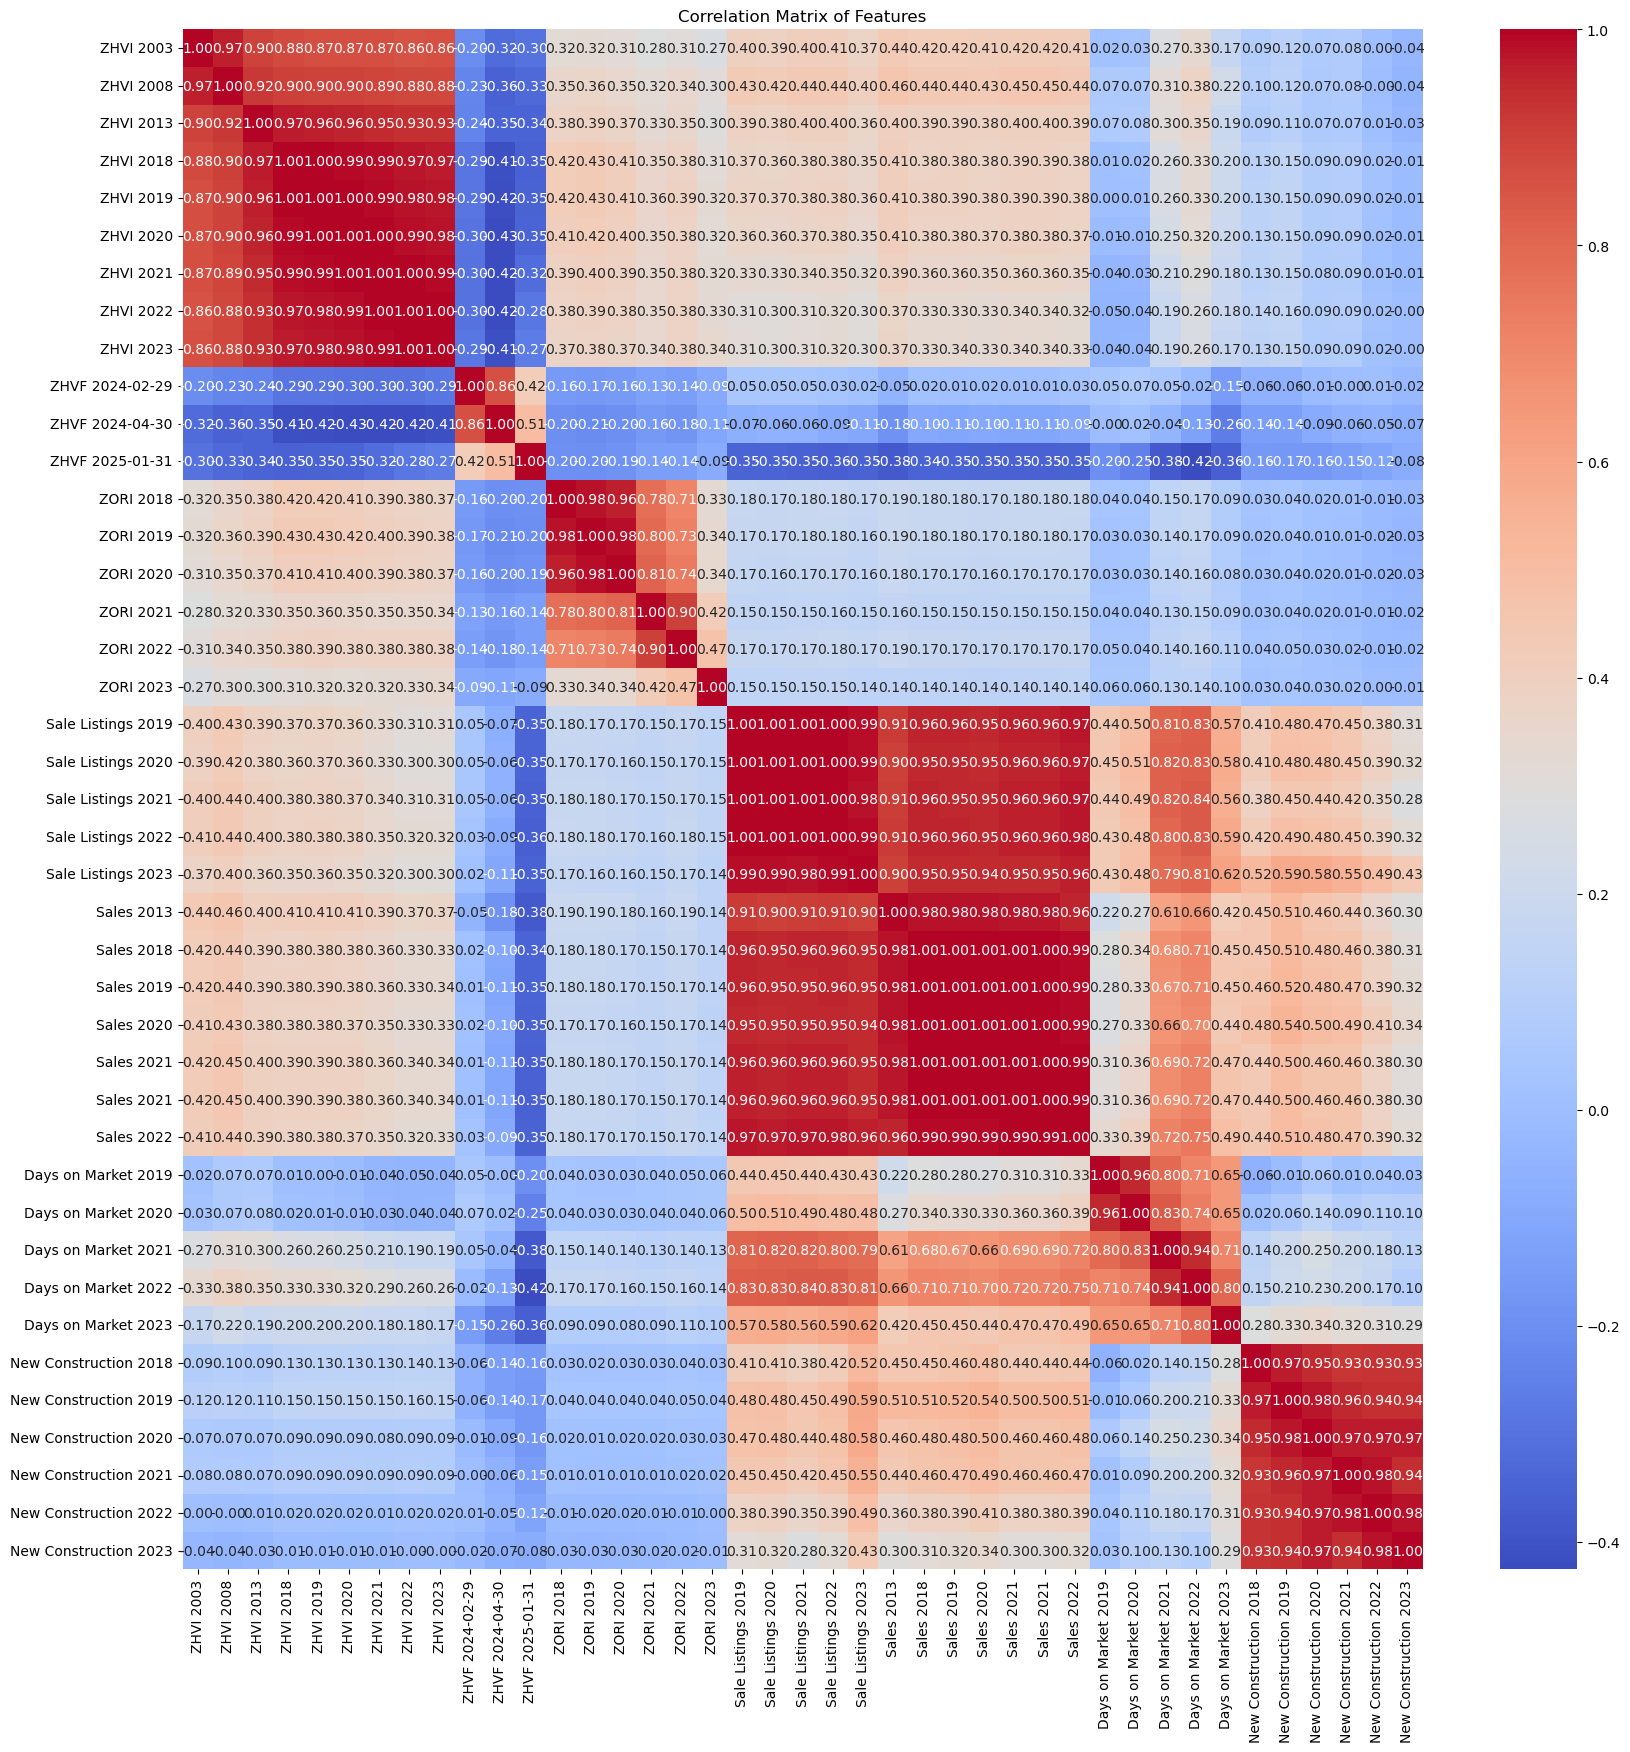

In [11]:
# Select numerical features for correlation analysis
numerical_features = df[['ZHVI 2003', 'ZHVI 2008', 'ZHVI 2013', 'ZHVI 2018', 'ZHVI 2019',
                         'ZHVI 2020', 'ZHVI 2021', 'ZHVI 2022', 'ZHVI 2023',
                         'ZHVF 2024-02-29', 'ZHVF 2024-04-30', 'ZHVF 2025-01-31',
                         'ZORI 2018', 'ZORI 2019', 'ZORI 2020', 'ZORI 2021',
                         'ZORI 2022', 'ZORI 2023', 'Sale Listings 2019', 
                         'Sale Listings 2020', 'Sale Listings 2021', 'Sale Listings 2022',
                         'Sale Listings 2023', 'Sales 2013', 'Sales 2018', 'Sales 2019',
                         'Sales 2020', 'Sales 2021', 'Sales 2022',
                         'Days on Market 2019', 'Days on Market 2020', 'Days on Market 2021',
                         'Days on Market 2022', 'Days on Market 2023', 'New Construction 2018',
                         'New Construction 2019', 'New Construction 2020',
                         'New Construction 2021', 'New Construction 2022',
                         'New Construction 2023']]

# Compute the correlation matrix
correlation_matrix = numerical_features.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")

# Add a title to the plot
plt.title('Correlation Matrix of Features')

# Show the plot
plt.show()

# More Info on column names
Zillow Home Value Index (ZHVI): A measure of the typical home value and market changes across a given region and housing type. It reflects the typical value for homes in the 35th to 65th percentile range. Available as a smoothed, seasonally adjusted measure and as a raw measure.

Zillow Home Value Forecast (ZHVF): A month-ahead, quarter-ahead and year-ahead forecast of the Zillow Home Value Index (ZHVI). 
ZHVF is created using the all homes, mid-tier cut of ZHVI and is available both raw and smoothed, seasonally adjusted.

Zillow Observed Rent Index (ZORI): A smoothed measure of the typical observed market rate rent across a given region. ZORI is a repeat-rent index that is weighted to the rental housing stock to ensure representativeness across the entire market, not just those homes currently listed for-rent. The index is dollar-denominated by computing the mean of listed rents that fall into the 40th to 60th percentile range for all homes and apartments in a given region, which is weighted to reflect the rental housing stock.

Sales(year): Indicates the count of sales during that particular year.

Sales Listings: Indicates how many new listings have come on the market in a given year.

Days on market: The number of days that a property has been listed on the website.

New Construction (year): The number of unique new construction homes that sold during the year. Available for the raw cut of single family residence and condo.

In [12]:
# columns_to_plot = [
#     'RegionID', 'SizeRankZip', 'RegionName', 'ZHVI 2003', 'ZHVI 2008',
#     'ZHVI 2013', 'ZHVI 2018', 'ZHVI 2019', 'ZHVI 2020', 'ZHVI 2021',
#     'ZHVI 2022', 'ZHVI 2023', 'ZHVF 2024-02-29', 'ZHVF 2024-04-30',
#     'ZHVF 2025-01-31', 'ZORI 2018', 'ZORI 2019', 'ZORI 2020', 'ZORI 2021',
#     'ZORI 2022', 'ZORI 2023', 'SizeRankMSA', 'Sale Listings 2019',
#     'Sale Listings 2020', 'Sale Listings 2021', 'Sale Listings 2022',
#     'Sale Listings 2023', 'Days on Market 2019', 'Days on Market 2020', 'Days on Market 2021',
#     'Days on Market 2022', 'Days on Market 2023', 'New Construction 2018',
#     'New Construction 2019', 'New Construction 2020',
#     'New Construction 2021', 'New Construction 2022',
#     'New Construction 2023'
# ]

# # Create pairplot
# sns.pairplot(df[columns_to_plot])
# plt.suptitle('Pairplot of Selected Columns', fontsize=16)
# plt.show()

In [13]:
# df['Sales 2013']
#, 'Sales 2018', 'Sales 2019',
#     'Sales 2020', 'Sales 2021', 'Sales 2022',

In [14]:
# columns_to_plot = [
#     'RegionID', 'SizeRankZip', 'RegionName',  'New Construction 2018',
#     'New Construction 2019', 'New Construction 2020',
#     'New Construction 2021', 'New Construction 2022',
#     'New Construction 2023'
# ]

# # Create pairplot
# sns.pairplot(df[columns_to_plot])
# plt.suptitle('Pairplot of Selected Columns', fontsize=16)
# plt.show()

In [15]:
# columns_to_plot = ['ZHVI 2003', 'ZHVI 2008', 'ZHVI 2013', 'ZHVI 2018', 
#                    'ZHVI 2019', 'ZHVI 2020', 'ZHVI 2021', 'ZHVI 2022', 'ZHVI 2023']

# # Creating subplots for each column
# fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
# fig.suptitle('Box Plots of ZHVI Columns', fontsize=16)

# # Flatten the axes array 
# axes = axes.flatten()

# # Iterate over each column and plot the box plot
# for i, column in enumerate(columns_to_plot):
#     sns.boxplot(x=df[column].dropna(), ax=axes[i])
#     axes[i].set_title(column)
#     axes[i].set_ylabel('Values')

# plt.tight_layout()
# plt.show()


In [16]:
df

,RegionID,SizeRankZip,RegionName,State,City,Metro,CountyName,ZHVI 2003,ZHVI 2008,ZHVI 2013,...,Days on Market 2020,Days on Market 2021,Days on Market 2022,Days on Market 2023,New Construction 2018,New Construction 2019,New Construction 2020,New Construction 2021,New Construction 2022,New Construction 2023
0,91982,1,77494,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,215776.356117,244120.000781,267861.316018,...,58.750000,33.416667,31.000000,46.500000,1563.916667,1167.750000,1471.083333,1611.666667,1921.250000,1851.25
1,91940,3,77449,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,111490.450128,124187.861811,117852.858386,...,58.750000,33.416667,31.000000,46.500000,1563.916667,1167.750000,1471.083333,1611.666667,1921.250000,1851.25
2,91733,5,77084,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,109631.516990,123577.558321,118606.886228,...,58.750000,33.416667,31.000000,46.500000,1563.916667,1167.750000,1471.083333,1611.666667,1921.250000,1851.25
3,91926,11,77433,TX,Cypress,"Houston-The Woodlands-Sugar Land, TX",Harris County,197878.948831,221744.762112,221765.792519,...,58.750000,33.416667,31.000000,46.500000,1563.916667,1167.750000,1471.083333,1611.666667,1921.250000,1851.25
4,92036,25,77573,TX,League City,"Houston-The Woodlands-Sugar Land, TX",Galveston County,159151.702851,190430.187900,193618.948995,...,58.750000,33.416667,31.000000,46.500000,1563.916667,1167.750000,1471.083333,1611.666667,1921.250000,1851.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82500,64464,20280,16133,PA,Jackson Center,"Youngstown-Warren-Boardman, OH-PA",Mercer County,90541.856357,112726.687819,101727.424069,...,68.095511,36.535776,32.816481,44.175617,55.166667,36.916667,36.500000,43.250000,41.333333,25.75
82501,64451,24287,16114,PA,Clarks Mills,"Youngstown-Warren-Boardman, OH-PA",Mercer County,90541.856357,112726.687819,101727.424069,...,68.095511,36.535776,32.816481,44.175617,55.166667,36.916667,36.500000,43.250000,41.333333,25.75
82502,64532,26643,16311,PA,Carlton,"Youngstown-Warren-Boardman, OH-PA",Mercer County,90541.856357,112726.687819,101727.424069,...,68.095511,36.535776,32.816481,44.175617,55.166667,36.916667,36.500000,43.250000,41.333333,25.75
82503,64484,28083,16161,PA,Wheatland,"Youngstown-Warren-Boardman, OH-PA",Mercer County,90541.856357,112726.687819,101727.424069,...,68.095511,36.535776,32.816481,44.175617,55.166667,36.916667,36.500000,43.250000,41.333333,25.75


In [17]:
n = pd.unique(df['ZHVF BaseDate'])
n

array(['2024-01-31'], dtype=object)

In [18]:
df['ZHVF BaseDate']

0        2024-01-31
1        2024-01-31
2        2024-01-31
3        2024-01-31
4        2024-01-31
            ...    
82500    2024-01-31
82501    2024-01-31
82502    2024-01-31
82503    2024-01-31
82504    2024-01-31
Name: ZHVF BaseDate, Length: 7525, dtype: object

In [19]:
# df_new = df.iloc[:, [18,19,20,21]]

In [20]:
# df_new

In [21]:
df.describe()

,RegionID,SizeRankZip,RegionName,ZHVI 2003,ZHVI 2008,ZHVI 2013,ZHVI 2018,ZHVI 2019,ZHVI 2020,ZHVI 2021,...,Days on Market 2020,Days on Market 2021,Days on Market 2022,Days on Market 2023,New Construction 2018,New Construction 2019,New Construction 2020,New Construction 2021,New Construction 2022,New Construction 2023
count,7525.000000,7525.000000,7525.000000,7.525000e+03,7.525000e+03,7.525000e+03,7.525000e+03,7.525000e+03,7.525000e+03,7.525000e+03,...,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000
mean,81632.406379,9102.672691,47925.433488,1.906614e+05,2.457125e+05,2.245311e+05,3.075435e+05,3.189768e+05,3.336800e+05,3.787063e+05,...,48.498322,27.705224,26.515406,35.269713,380.558505,303.647542,317.963125,357.208672,346.854742,329.141054
std,37542.367639,7453.420704,30384.066468,1.495881e+05,2.010362e+05,2.036261e+05,2.839179e+05,2.871399e+05,2.872035e+05,3.183697e+05,...,15.807934,11.784738,9.244756,11.177956,375.529226,290.633583,327.941330,332.775794,376.630037,404.054363
min,58196.000000,1.000000,1001.000000,1.889768e+04,1.299635e+04,1.295245e+04,1.665388e+04,1.913582e+04,2.112737e+04,2.691980e+04,...,21.333333,13.666667,14.916667,17.250000,22.083333,18.666667,8.200000,11.272727,20.583333,10.000000
25%,65749.000000,3347.000000,19072.000000,9.054186e+04,1.127267e+05,1.080819e+05,1.551058e+05,1.650294e+05,1.768985e+05,2.024914e+05,...,38.000000,20.000000,21.250000,26.166667,89.166667,70.916667,82.416667,103.416667,101.750000,96.333333
50%,77476.000000,7163.000000,45066.000000,1.482989e+05,1.885359e+05,1.680619e+05,2.304003e+05,2.418650e+05,2.558470e+05,2.922271e+05,...,45.000000,25.833333,24.166667,34.083333,286.000000,228.666667,232.250000,277.583333,258.000000,206.500000
75%,91252.000000,13064.000000,76021.000000,2.326750e+05,3.008766e+05,2.656214e+05,3.604444e+05,3.747061e+05,3.955540e+05,4.565435e+05,...,57.166667,31.416667,29.166667,39.250000,531.583333,479.666667,430.750000,480.416667,485.333333,367.500000
max,787971.000000,39992.000000,99224.000000,2.190079e+06,2.662823e+06,3.230149e+06,3.787165e+06,4.180072e+06,4.346198e+06,4.760956e+06,...,101.666667,67.416667,58.166667,75.333333,1573.416667,1211.750000,1471.083333,1611.666667,1921.250000,1851.250000


In [22]:
d1.isnull().sum()

RegionID                 0
SizeRankZip              0
RegionCode               0
ZHVI 2003                0
ZHVI 2008                0
ZHVI 2013                0
ZHVI 2018                0
ZHVI 2019                0
ZHVI 2020                0
ZHVI 2021                0
ZHVI 2022                0
ZHVI 2023                0
ZHVF 2024-02-29          0
ZHVF 2024-04-30          0
ZHVF 2025-01-31          0
ZORI 2018                0
ZORI 2019                0
ZORI 2020                0
ZORI 2021                0
ZORI 2022                0
ZORI 2023                0
SizeRankMSA              0
Sale Listings 2019       0
Sale Listings 2020       0
Sale Listings 2021       0
Sale Listings 2022       0
Sale Listings 2023       0
Sales 2013               0
Sales 2018               0
Sales 2019               0
Sales 2020               0
Sales 2021               0
Sales 2022               0
Sales 2021               0
Days on Market 2019      0
Days on Market 2020      0
Days on Market 2021      0
D

In [23]:
 missing_values = d1.isna().sum()
 print(missing_values)

RegionID                 0
SizeRankZip              0
RegionCode               0
ZHVI 2003                0
ZHVI 2008                0
ZHVI 2013                0
ZHVI 2018                0
ZHVI 2019                0
ZHVI 2020                0
ZHVI 2021                0
ZHVI 2022                0
ZHVI 2023                0
ZHVF 2024-02-29          0
ZHVF 2024-04-30          0
ZHVF 2025-01-31          0
ZORI 2018                0
ZORI 2019                0
ZORI 2020                0
ZORI 2021                0
ZORI 2022                0
ZORI 2023                0
SizeRankMSA              0
Sale Listings 2019       0
Sale Listings 2020       0
Sale Listings 2021       0
Sale Listings 2022       0
Sale Listings 2023       0
Sales 2013               0
Sales 2018               0
Sales 2019               0
Sales 2020               0
Sales 2021               0
Sales 2022               0
Sales 2021               0
Days on Market 2019      0
Days on Market 2020      0
Days on Market 2021      0
D

In [24]:
# median_sales_2021 = d1['Sales 2021'].median()

# # Replace NaN values with the median value
# d1['Sales 2021'].fillna(median_sales_2021, inplace=True)

# # Verify the changes
# print(d1['Sales 2021'])

In [25]:
# median_sales_2022 = d1['Sales 2022'].median()

# # Replace NaN values with the median value
# d1['Sales 2022'].fillna(median_sales_2022, inplace=True)

# # Verify the changes
# print(d1['Sales 2022'])

In [28]:
import pandas as pd

# Assuming df is your DataFrame containing the 'State' column
# Assuming d1 is your DataFrame containing the sales columns

# Extract the 'State' column from DataFrame df
state_col = df['State']

# Extract the sales columns from DataFrame d1
sales_cols = d1[['Sales 2018', 'Sales 2019', 'Sales 2020', 'Sales 2021', 'Sales 2022']]

# Merge the two dataframes on their indices
merged_df = pd.merge(state_col, sales_cols, left_index=True, right_index=True)

# Display the merged DataFrame
print(merged_df)


      State   Sales 2018   Sales 2019   Sales 2020   Sales 2021   Sales 2021  \
0        TX  6697.500000  6668.750000  7189.333333  8487.583333  8487.583333   
1        TX  6697.500000  6668.750000  7189.333333  8487.583333  8487.583333   
2        TX  6697.500000  6668.750000  7189.333333  8487.583333  8487.583333   
3        TX  6697.500000  6668.750000  7189.333333  8487.583333  8487.583333   
4        TX  6697.500000  6668.750000  7189.333333  8487.583333  8487.583333   
...     ...          ...          ...          ...          ...          ...   
82500    PA  3159.333333  3094.083333  3253.916667  3776.000000  3776.000000   
82501    PA  3159.333333  3094.083333  3253.916667  3776.000000  3776.000000   
82502    PA  3159.333333  3094.083333  3253.916667  3776.000000  3776.000000   
82503    PA  3159.333333  3094.083333  3253.916667  3776.000000  3776.000000   
82504    PA  3159.333333  3094.083333  3253.916667  3776.000000  3776.000000   

        Sales 2022  
0      7043.083333

In [32]:
# import matplotlib.pyplot as plt

# # Create a figure and subplots
# fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 20))

# # List of sales columns
# sales_columns = ['Sales 2018', 'Sales 2019', 'Sales 2020', 'Sales 2021', 'Sales 2022']

# # Loop through each sales column and plot against 'State'
# for i, col in enumerate(sales_columns):
#     ax = axes[i]
#     ax.scatter(merged_df['State'], merged_df[col], color='blue')
#     ax.set_xlabel('State')
#     ax.set_ylabel(col)
#     ax.set_title(f'Scatter Plot of {col} vs State')

# # Adjust layout
# plt.tight_layout()
# plt.show()

